### Augmented reality - Project A.3
Authors: Attanasio Luca, Savio Francesco

### Assigment

Stereo disparity computation from projected random dot pattern. Given 1
a couple of stereo images from Aquifi camera, compute disparity using a multi-layer hierarchical approach, i.e., computing the disparity on a reduced resolution version of the two images and re-using the results of this computation at the higher resolution layer.
Use up to three decomposition layers and measure the complexity reduction and the accuracy obtained.
Dataset is available at http://www.dei.unipd.it/~sim1mil/CVcourse/imagesStereo.zip

Stereo disparity: 


Projected random dot pattern: 
<img src="stereo.jpg" width="200">


Aquifi camera:


Multi-layer hierarchical approach (three decompision layers): compute the disparity on a reduced resolution version of the two images and re-using the results of this computation at the higher resolution layer.


Assignment: measure the complexity reduction and the accuracy obtained.

In [1]:
# !curl http://www.dei.unipd.it/~sim1mil/CVcourse/imagesStereo.zip --output imagesStereo.zip

In [2]:
# !unzip imagesStereo.zip
# !rm imagesStereo.zip

# Commenti per il progetto
##### SAVIO: 
Ho cambiato due cosette per caricare le immagini cosi è piu facile cambiare le immagini. La disparity map è giusta farla in grey? Mi ricordo che nel primo lab era tipo a colori, o forse era la depth estimation. E come facciamo a calcolare l'accuracy? ce tipo noi dobbiamo calcolarci la disparity map per delle immagini a bassa risoluzione dentro un for dove cambiamo i parametri, vediamo quale parametri hanno la miglior accuracy e usiamo quei parametri per calcolare la disparity map con immagini a maggior risoluzione?

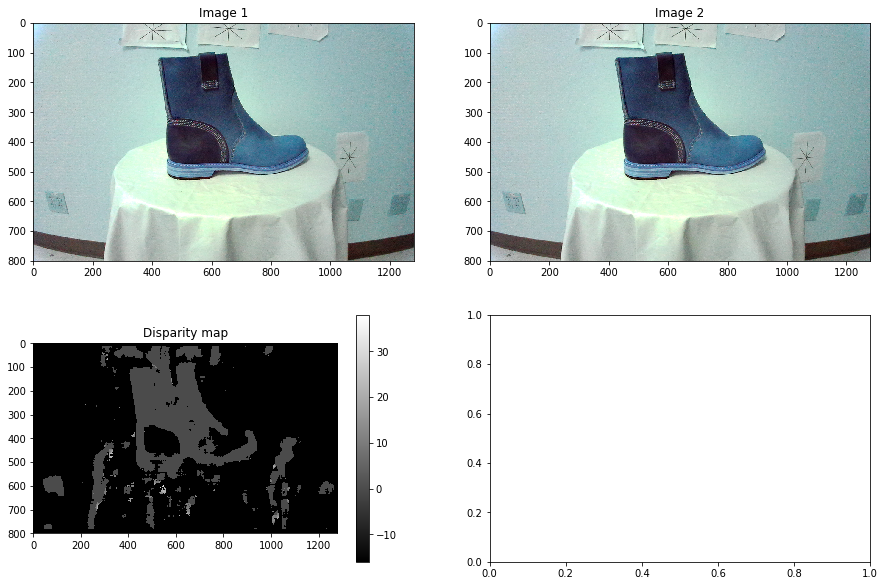

In [69]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm
%matplotlib inline

# Choose the directory
image_name = "2" # 1, 2 or 3

directory1 = "./Data/imagesStereo/model"+image_name+"/file/color0_1.png"
directory2 = "./Data/imagesStereo/model"+image_name+"/file/color0_2.png"

#Load images 
imgL = cv.imread(directory1) 
imgR = cv.imread(directory2)

# See the images
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax1.imshow(imgL)
ax1.set_title("Image 1")
ax2.set_title("Image 2")
ax2.imshow(imgR)

# Compute the disparity

imgL_new = cv.cvtColor(imgL, cv.COLOR_BGR2GRAY)
imgR_new = cv.cvtColor(imgR, cv.COLOR_BGR2GRAY)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=31)
disparity = stereo.compute(imgL_new,imgR_new)
_ = ax3.imshow(disparity, "gray")
ax3.set_title("Disparity map")
fig.colorbar(_ , ax=ax3);


To reduce the image size

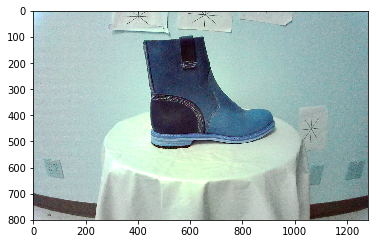

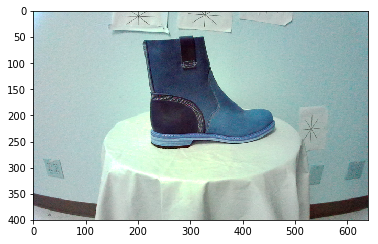

In [70]:
lower_res_image = cv.resize(imgL, (int(imgL.shape[1]/2), int(imgL.shape[0]/2)))
plt.imshow(imgL)
plt.show()
plt.imshow(lower_res_image)
plt.show()